# HR DATA: Who is likely to leave the organization

### Objective
- Explore the HR data and share some insights based on the features present in the dataset
- The dependent/target feature is : 'left'
- left=1, employee will leave the organization.
- left=0, employee will not leave the organization.

### Why to perform this analysis
- One of the biggest problems in corporate work now-a-days is the employee turnover
- Now incase of replacing a leaving employee can cost multiple things like - cost of end-to-end hiring process, onboarding of the new employee, tarining time of the new employee, project planinng and managing cost is alos associated with it.

### Focus of this Analysis
- How each feature is related to the target feature, 'left'
- Find meaningful patterns of employee trails
- Which can be potentially significant features to predict who is likely to leave the organization
- Find the top 3 features which can affect an employees leaving decision the most
- Can we suggest some retention srategies on target employees so that action can be taken to make them stay in the organization, which will be a win-win from employee as well as business perspective.

### Action plan and Conclusion
- Based on the analysis what could be a possible action plan to retain an employee

### Data gathering and storing into a Dataframe:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
hr = pd.read_csv(r'C:\Users\91842\Downloads\HR-data.csv.txt')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [32]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

- So there are no null values present

In [8]:
hr.duplicated().sum()

3008

- There are total 3008 duplicate records
- We will keep only the first record and rest we will not consider for further steps

In [10]:
#drop duplicates:
hr.drop_duplicates(keep= 'first',inplace=True)

In [11]:
sum(hr.duplicated())

0

In [12]:
hr.shape

(11991, 10)

- After dropping duplicate records now we have 11991 rows and 10 columns

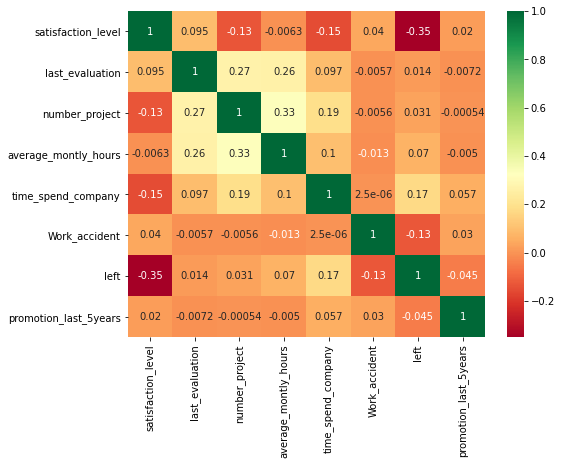

In [335]:
import seaborn as sns
#get correlations of each features in dataset

plt.figure(figsize=(8,6))

#plot heat map
sns.heatmap(hr.corr(),annot=True,cmap="RdYlGn");

- 'left' is negatively correlated with 'satisfaction_level'. The degree of this relationship is week.
- 'left' is positively correlated with 'time_spend_company'. The degree of this relationship is also week.

- Let's explore 'sales' column now 

In [13]:
hr['sales'].value_counts()

sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: sales, dtype: int64

- It seems that 'sales' column has multiple department names in it. 
- Therefore, 'sales' is not a proper naming for this column. Let's rename it to 'Dept'

In [14]:
#change the colm name from sales to Dept:
hr.rename(columns = {'sales':'Dept'}, inplace=True)
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [15]:
hr['Dept'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

**Q1. Which dept has the most left employees?**

In [17]:
#which dept has most left people
df1 = hr[hr['left'] == 1][['Dept','satisfaction_level']]
df1['Dept'].value_counts()

sales          550
technical      390
support        312
IT             158
hr             113
marketing      112
product_mng    110
accounting     109
RandD           85
management      52
Name: Dept, dtype: int64

- It seems that the top three departments from which most of the employees left are - 'sales', 'technical', 'support'. The left employees number in other departments is less in comparison to these 3 departemnts.

**Q2. What is the satisfaction level who have alreay left in comparison to the overall employees satisfaction level. Is there any significant difference present in these 2 groups?**

In [33]:
#Let's check the 'statisfaction_level' column
hr['satisfaction_level'].describe()

count    11991.000000
mean         0.629658
std          0.241070
min          0.090000
25%          0.480000
50%          0.660000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [35]:
df1['satisfaction_level'].describe()

count    1991.000000
mean        0.440271
std         0.265207
min         0.090000
25%         0.110000
50%         0.410000
75%         0.730000
max         0.920000
Name: satisfaction_level, dtype: float64

- Overall average employees satisfaction level is 0.63
- The average satisfaction level who have left is only 0.44
- Now notice the 50th percentile data in both the cases. For overall employees data 50% of the satisfaction_level is less than 0.66. Whereas, for left employees data 50% of the satisfaction_level is less than 0.41
- So, seems like satisfaction_level can be considered as a good predictor for this dataset

**Q3. Which depatments are having the most dissatisfied employees?**

In [30]:
df1.groupby('Dept').agg({'satisfaction_level':'mean'}).sort_values(by='satisfaction_level')

,satisfaction_level
Dept,
accounting,0.414679
IT,0.417089
hr,0.422478
technical,0.428897
RandD,0.433529
management,0.435962
sales,0.450400
support,0.451506
marketing,0.454375


- The average left employees satisfaction level is 0.44
- There are few departments like 'accounting' and 'IT' where the average satisfaction level (0.41) is less than 0.44
- But there is not a huge difference in satisfaction_level for different departments

### EDA:
- Univariate Analysis

**Q4. What is the %of peolple who have left?**

<AxesSubplot:ylabel='left'>

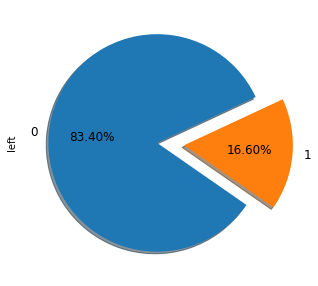

In [38]:
plt.figure(figsize=(5,5))
hr['left'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, fontsize=12, startangle=25)

**Q5. How the distribution of feature 'satisfaction_level' looks like?**

C:\Users\91842\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


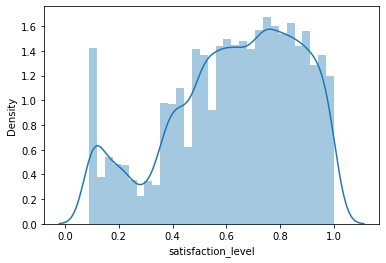

In [39]:
sns.distplot(hr['satisfaction_level']);

- It seems to a bi-modal distribution
- Most of the satisfcatio_level is lying in between 0.6 to 0.8. But there are some highly satisfied employees as well with satisfaction level of above 0.9
- On the other hand, there are some completely dissatisfied employees with satisfaction level <0.3. We can see there is a high spike at level close to 0.1

**Q6. How the column 'last_evaluation' looks like?**

<AxesSubplot:xlabel='last_evaluation'>

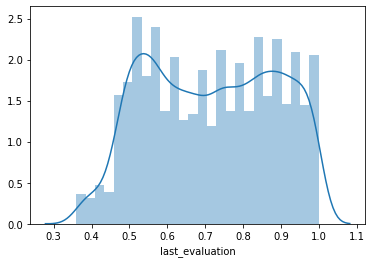

In [366]:
sns.distplot(hr['last_evaluation'])

- All the employees are evaluated

**Bivariate analysis**

- saitisfaction vs evaluation

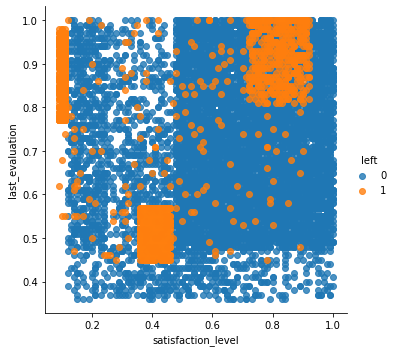

In [368]:
#now do a bivariate: saitisfaction vs evaluation:
sns.lmplot(x = 'satisfaction_level',
          y = 'last_evaluation',
          data=hr,
          fit_reg=False,
          hue='left');

So clearly there are 3 clusters** 
- Cluster1: Not good employees and dissatisfied 
- Cluster2: Not so good and also less satisfied 
- Cluster3: Good employees and satisfied

- number_project vs left

C:\Users\91842\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='number_project', ylabel='count'>

<Figure size 432x288 with 0 Axes>

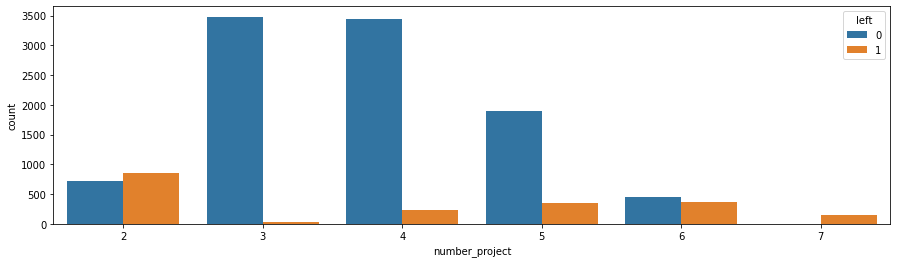

In [40]:
#plot 2 categorical colms: Dept anf Left
#It gives dept wise howmany people left and stayed:
fig = plt.figure()

fig, plt.figure(figsize=(15,4))

sns.countplot(hr['number_project'], hue=hr['left'])

- If an employee is assigned more than 6 projects then he/she has left
- Employees with project numbers between 3 to 5 are less likely to leave
- Most of the employees are having 3 projects or 4 projects

- Dept vs salary

C:\Users\91842\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

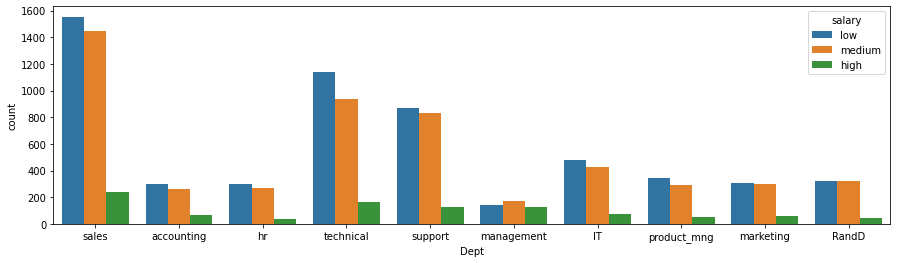

In [44]:
#Dept wise salary:
fig = plt.figure()

fig, plt.figure(figsize=(15,4))

sns.countplot(hr['Dept'], hue=hr['salary']);

- Among all the departments 'sales', 'technical' and 'support' is having the maximum number of low salaried employees
- 'management' is the only department where maximum number of employees are having medium range salary. And the proportion of high salary and medium salary is greater than the low salary

- 'time_spend_company' vs left

C:\Users\91842\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

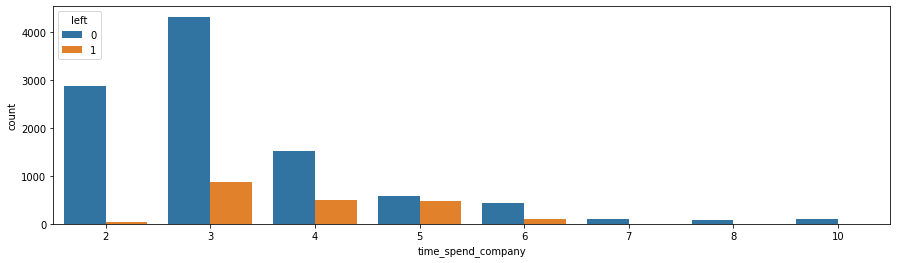

In [45]:
#see 'time_spend_company' vs left:
fig = plt.figure()

fig, plt.figure(figsize=(15,4))

sns.countplot(hr['time_spend_company'], hue=hr['left']);

- It seems that people who stays longer period in the organization are less likely of leaving
- And also there are some employees who stays for more than 6 years and have not left the organization
- Peolpe with lesss than 4 years are most likely to leave the organization

- 'average_montly_hours' vs 'left'

C:\Users\91842\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


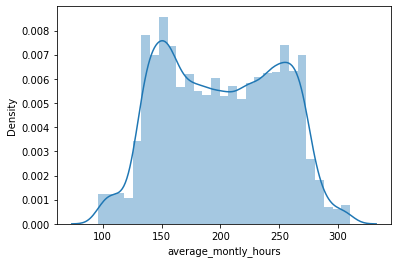

In [49]:
sns.distplot(hr['average_montly_hours']);

- Now it is a clear bi-modal distribution
- Most of the employee's average montly hours is around 140-150 hrs. 
- On another side it's visible that there are some employees whose average montly hours is as high as >=250 hrs
- Also very few people who works as less as <100hrs

In [52]:
hr['average_montly_hours_bin']=pd.cut(x = hr['average_montly_hours'], bins=[50,150,250,350], labels=['Low','Medium','High'])

C:\Users\91842\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

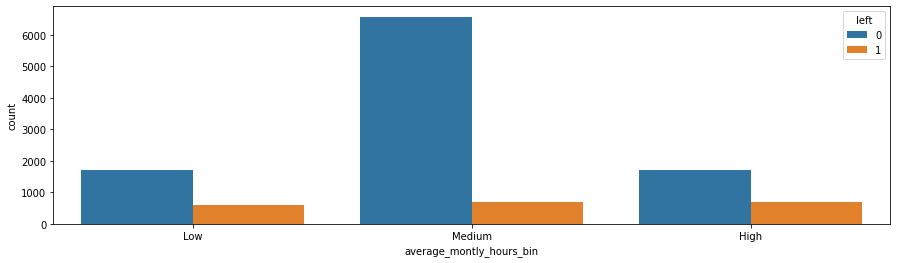

In [53]:
#see 'time_spend_company' vs left:
fig = plt.figure()

fig, plt.figure(figsize=(15,4))

sns.countplot(hr['average_montly_hours_bin'], hue=hr['left']);

- Most of the employee's average_montly_hours is in between 150hrs to 250 hrs
- Employees who has ample amount of average work/month are very likely to stay in the organization
- Employyes who are over loaded with work are likely to leave
- Employees who has comparetively less work (average_montly_hours<150) are also likely to leave

- promotion_last_5years vs left

C:\Users\91842\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

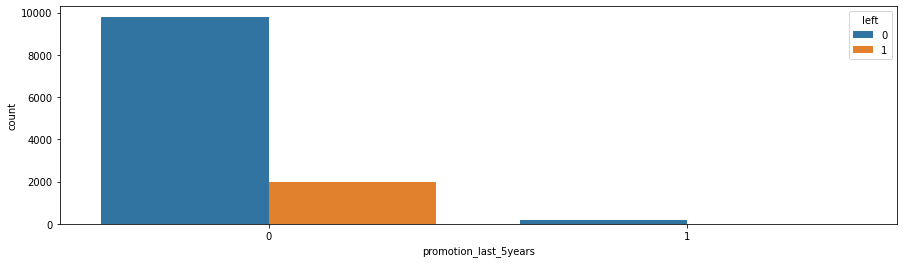

In [54]:
#see 'time_spend_company' vs left:
fig = plt.figure()

fig, plt.figure(figsize=(15,4))

sns.countplot(hr['promotion_last_5years'], hue=hr['left']);

- It seems that all those employees who got promoted in the last 5 years though they are very less in number, have not left the company

### EDA Concluding Remarks

- The dataset does not feature any missing or erroneous data values, and all features are of the correct data type
- Among all the features the strongest positive correlation with the target feature is: time_spend_company
- Similarly the strongest negative correlation with the target feature is: satisfaction_level
- The dataset is imbalanced with the majoriy of observations describing non-leaving Employees.
- Most of the leavers left when they reach their 2-3year anniversary at the company.
- People who live further away from their work show higher proportion of leavers compared to their counterparts.
- People who got promoted in the last 5 years have not left the company compared to their counterparts.
- People who have to work overtime/multiple number of projects at the same time show higher proportion of leavers compared to their counterparts.

### Action Plan or Retention Strategy Based On Analysis

- We can rank the employees by their probability of leaving the organization 
- Then allocate a limited incentive budget to the highest probability employees
- Develop learning programs for them
- Gather feedbacks from them on their growth and career goals alignment etc